In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv("customer_churn.csv") #reading the file
df.head() #finding the first few rows


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors='coerce') #it helps handle invalid values 

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#drop null values
df.dropna(inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

A)	Data Manipulation:

 a.	Extract the 5th column & store it in ‘customer_5’


In [13]:

customer_5=df.iloc[:,4] 
customer_5.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

b.	Extract the 15th column & store it in ‘customer_15’

In [15]:

customer_15=df.iloc[:,14] 
customer_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

c.	Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’

In [17]:

senior_male_electronic=df[(df['gender']=='Male') & (df['SeniorCitizen']==1) & (df['PaymentMethod']=='Electronic check')]
senior_male_electronic.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.30,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.70,No


d.	Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’

In [19]:
customer_total_tenure= df[(df['tenure']>70)|(df['MonthlyCharges']>100)]
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


e.	Extract all the customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’

In [21]:
two_mail_yes= df[(df['Contract']=='Two year') & (df['PaymentMethod']=='Mailed check') & (df['Churn']=='Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.60,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.30,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


f.	Extract 333 random records from the customer_churn dataframe & store the result in ‘customer_333’

In [23]:
customer_333= df.sample(n=333)
customer_333.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6083,1468-DEFNC,Male,1,Yes,Yes,64,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.40,1548.65,No
840,0727-BMPLR,Female,1,No,No,55,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,100.00,5509.30,Yes
6859,3508-CFVZL,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,111.30,7985.90,No
4703,2956-GGUCQ,Male,1,Yes,No,24,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.85,1772.25,Yes
4456,1619-YWUBB,Female,0,Yes,No,68,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.95,1614.90,No


In [24]:
len(customer_333)

333

g.	Get the count of different levels from the ‘Churn’ column

In [26]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

B)	Data Visualization:



a.	Build a bar-plot for the ’InternetService’ column:

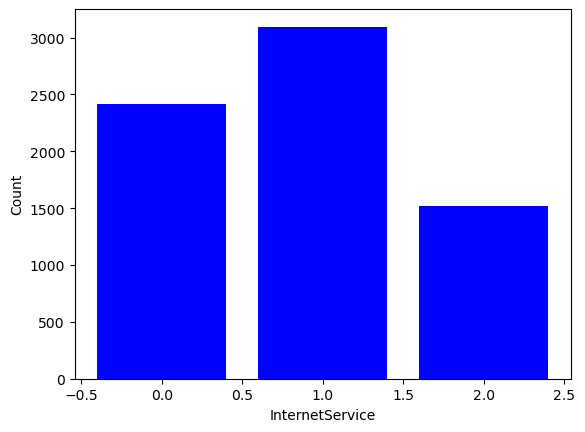

In [161]:
plt.bar(df['InternetService'].value_counts().keys().tolist(),df['InternetService'].value_counts().tolist(),color='blue')

# Add labels and title
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.show()

i.	Set x-axis label to ‘Categories of Internet Service’

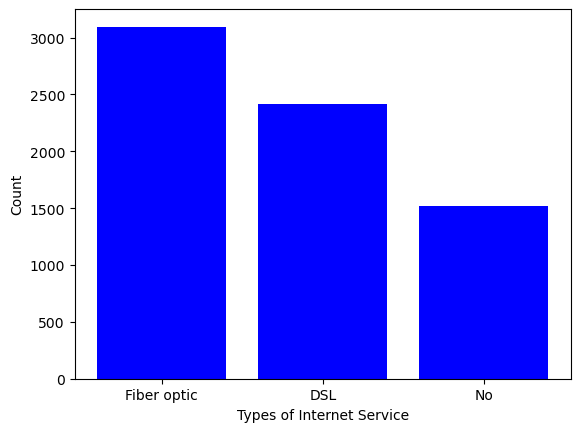

In [31]:
plt.bar(df['InternetService'].value_counts().keys().tolist(),df['InternetService'].value_counts().tolist(),color='blue')

# Add labels and title
plt.xlabel('Types of Internet Service')
plt.ylabel('Count')
plt.show()

ii.	Set y-axis label to ‘Count of Categories’

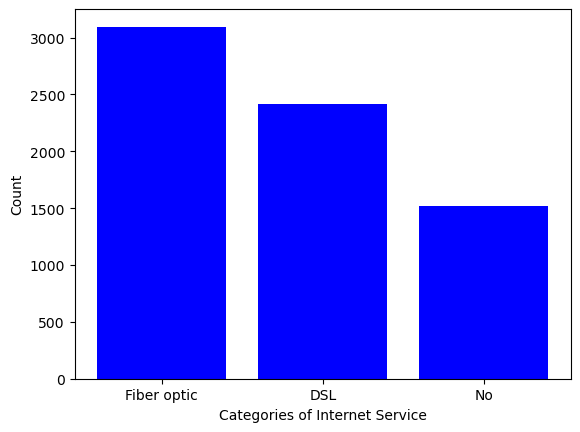

In [33]:
plt.bar(df['InternetService'].value_counts().keys().tolist(),df['InternetService'].value_counts().tolist(),color='blue')

# Add labels and title
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count')
plt.show()

iii.	Set the title of plot to be ‘Distribution of Internet Service’

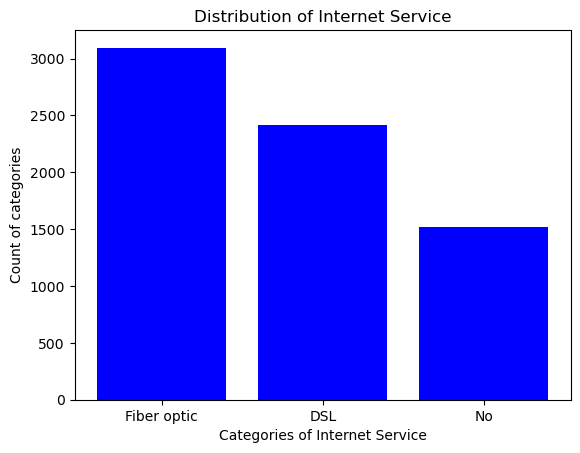

In [35]:
plt.bar(df['InternetService'].value_counts().keys().tolist(),df['InternetService'].value_counts().tolist(),color='blue')

# Add labels and title
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')
plt.show()

iv.	Set the color of the bars to be ‘orange’

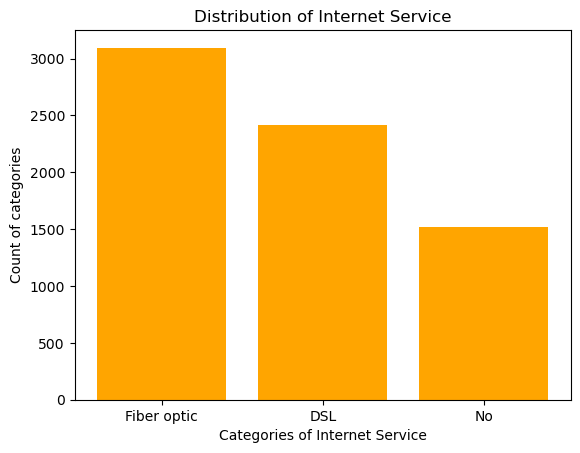

In [37]:
plt.bar(df['InternetService'].value_counts().keys().tolist(),df['InternetService'].value_counts().tolist(),color='orange')

# Add labels and title
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')
plt.show()


b.	Build a histogram for the ‘tenure’ column:
i.	Set the number of bins to be 30


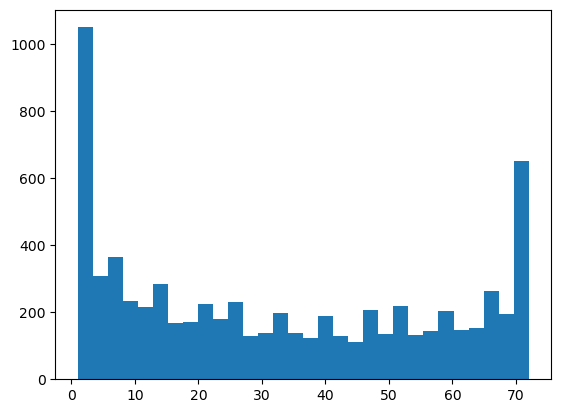

In [39]:
plt.hist(df['tenure'], bins=30)
plt.show()

ii.	Set the color of the bins  to be ‘green’

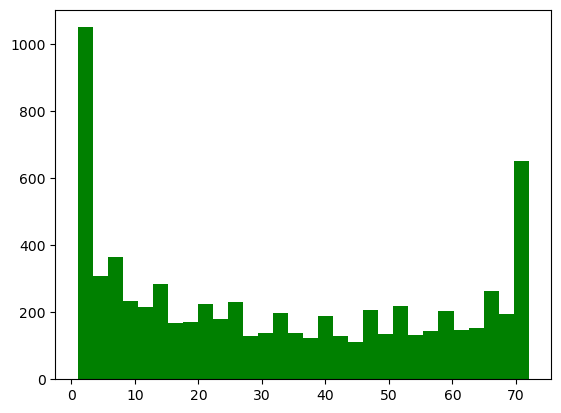

In [41]:
plt.hist(df['tenure'], bins=30,color='green')
plt.show()

iii.	Assign the title ‘Distribution of tenure’

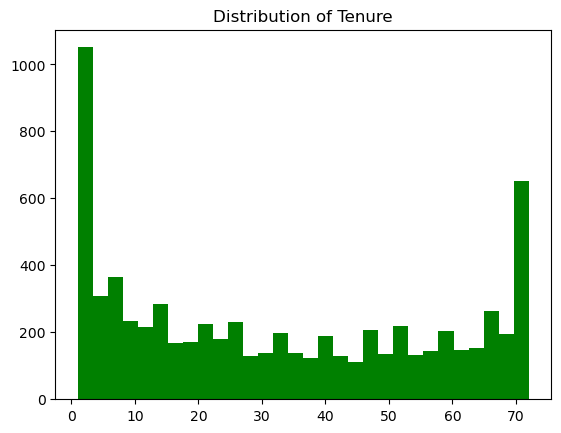

In [43]:
plt.hist(df['tenure'], bins=30,color='green')
plt.title('Distribution of Tenure')
plt.show()

c.	Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to the y-axis & ‘tenure’ to the ‘x-axis’:
i.	Assign the points a color of ‘brown’


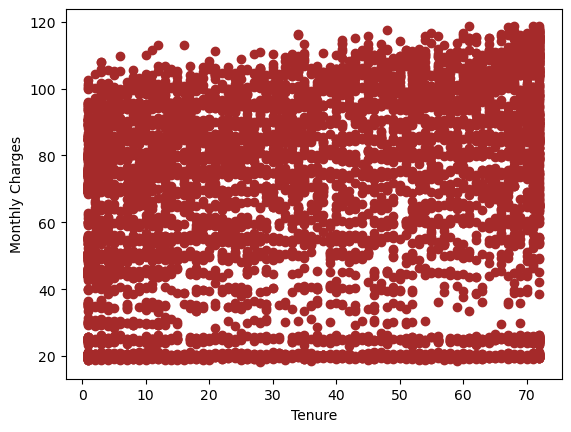

In [45]:
plt.scatter(x=df['tenure'],y=df['MonthlyCharges'],color='brown')

# Add labels and title
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()

ii.	Set the x-axis label to ‘Tenure of customer’

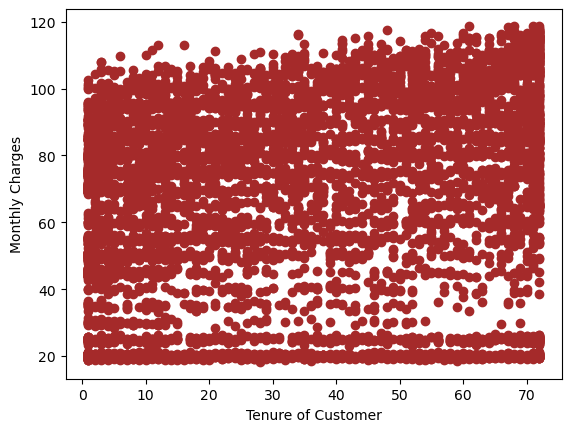

In [47]:
plt.scatter(x=df['tenure'],y=df['MonthlyCharges'],color='brown')

# Add labels and title
plt.xlabel('Tenure of Customer')
plt.ylabel('Monthly Charges')
plt.show()

iii.	Set the y-axis label to ‘Monthly Charges of customer’

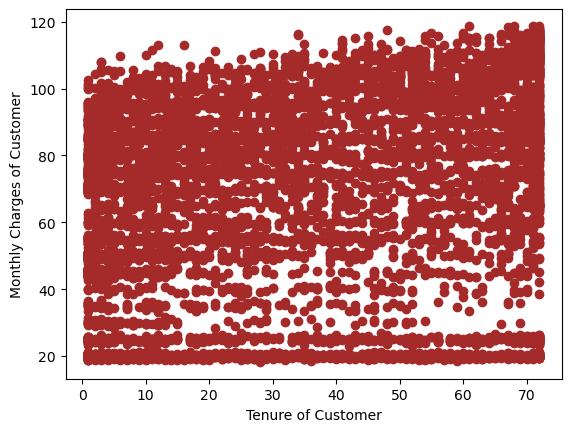

In [49]:
plt.scatter(x=df['tenure'],y=df['MonthlyCharges'],color='brown')

# Add labels and title
plt.xlabel('Tenure of Customer')
plt.ylabel('Monthly Charges of Customer')
plt.show()

iv.	Set the title to ‘Tenure vs Monthly Charges’

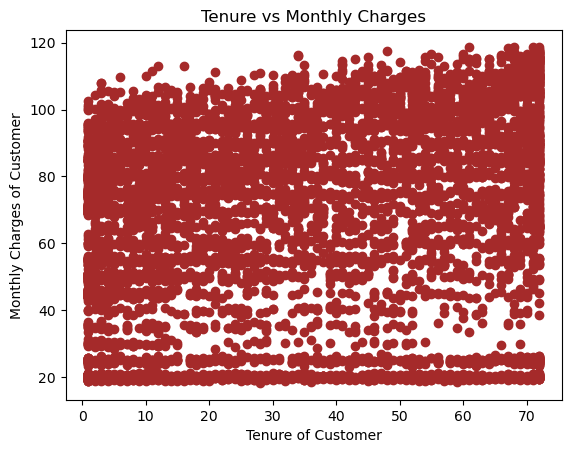

In [51]:
plt.scatter(x=df['tenure'],y=df['MonthlyCharges'],color='brown')

# Add labels and title
plt.xlabel('Tenure of Customer')
plt.ylabel('Monthly Charges of Customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

d.	Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis. 

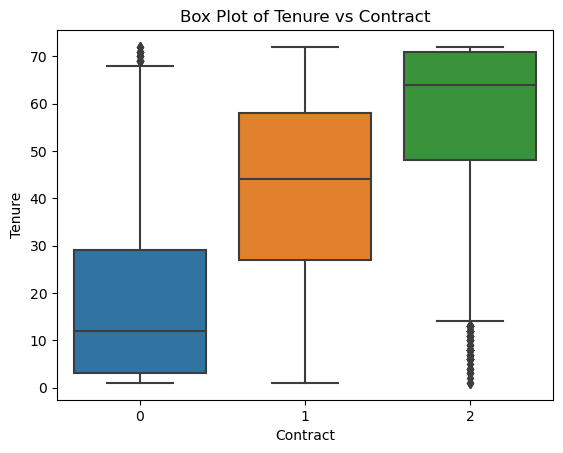

In [163]:

# Create the box plot
sns.boxplot(x=df['Contract'], y=df['tenure'])

# Add labels and title
plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.title('Box Plot of Tenure vs Contract')

# Show the plot
plt.show()

In [53]:
le = LabelEncoder()

In [54]:
for col in df.columns:
  if(df[col].dtype == 'object'):
    df[col] =le.fit_transform(df[col])

In [55]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   int32  
 1   gender            7032 non-null   int32  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int32  
 4   Dependents        7032 non-null   int32  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int32  
 7   MultipleLines     7032 non-null   int32  
 8   InternetService   7032 non-null   int32  
 9   OnlineSecurity    7032 non-null   int32  
 10  OnlineBackup      7032 non-null   int32  
 11  DeviceProtection  7032 non-null   int32  
 12  TechSupport       7032 non-null   int32  
 13  StreamingTV       7032 non-null   int32  
 14  StreamingMovies   7032 non-null   int32  
 15  Contract          7032 non-null   int32  
 16  PaperlessBilling  7032 non-null   int32  



C)	Linear Regression:
a.	Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import r2_score


i.	Divide the dataset into train and test sets in 70:30 ratio. 

In [60]:

# Selecting features and target variable
X = df[['tenure']]
y = df['Churn']

# Splitting the dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

# Training the model
linear_regressor = LinearRegression() 
linear_regressor.fit(X_train, y_train)  


LinearRegression()

In [61]:
# Generate predictions
y_pred = linear_regressor.predict(X_test)  
y_pred

    

array([0.27917849, 0.01977675, 0.3867353 , ..., 0.02610362, 0.2095829 ,
       0.39306218])

iii.	After predicting the values, find the root mean square error
iv.	Find out the error in prediction & store the result in ‘error’
v.	Find the root mean square error


In [63]:
# Compute error for each prediction
error = y_test - y_pred

# Convert to DataFrame for better visualization

error_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error': error})
print(error_df.head())  # Display first few error values


      Actual  Predicted     Error
5401       0   0.279178 -0.279178
1681       0   0.019777 -0.019777
2076       0   0.386735 -0.386735
3359       0   0.342447 -0.342447
6629       0   0.019777 -0.019777


In [64]:
# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.4119688835977518


In [65]:
# Accuracy
r2_score(y_test, y_pred)

0.12849449631656318

#----------------------------------Logistic Regression-------------------------------

D)	Logistic Regression:
a.	Build a simple logistic regression model where dependent variable is ‘Churn’ & independent variable is ‘MonthlyCharges’


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

i.	Divide the dataset in 65:35 ratio
ii.	Build the model on train set and predict the values on test set

In [69]:
# Selecting features and target variable
X = df[['MonthlyCharges']]
y = df['Churn']


# Splitting the dataset (65% train, 35% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)


# Standardiization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Training the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)




LogisticRegression()

In [70]:
# Generate predictions
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

iii.	Build the confusion matrix and get the accuracy score

In [72]:
# Confusion matrix
confusion_matrix(y_pred,y_test)

array([[1821,  641],
       [   0,    0]], dtype=int64)

In [73]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.739642567018684


b.	Build a multiple logistic regression model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ & ‘MonthlyCharges’
i.	Divide the dataset in 80:20 ratio


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [76]:
# Selecting features and target variable
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

# Splitting the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

# Standardiization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Training the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

ii.	Build the model on train set and predict the values on test set

In [78]:
# Generate predictions
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

iii.	Build the confusion matrix and get the accuracy score

In [80]:
# Confusion matrix
confusion_matrix(y_pred,y_test)

array([[947, 185],
       [ 99, 176]], dtype=int64)

In [81]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7981520966595593



E)	Decision Tree:
a.	Build a decision tree model where dependent variable is ‘Churn’ & independent variable is ‘tenure’
i.	Divide the dataset in 80:20 ratio


In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [84]:
# Selecting features and target variable
X = df[['tenure']]
y = df['Churn']

# Splitting the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

# Standardiization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Training the model
clf = DecisionTreeClassifier()
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

ii.	Build the model on train set and predict the values on test set

In [86]:
# Generate predictions
y_pred = clf.predict(X_test_scaled)
print(y_pred)

[0 0 0 ... 0 0 0]


iii.	Build the confusion matrix and calculate the accuracy

In [88]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[962  84]
 [263  98]]


In [89]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7533759772565742


In [90]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      1046
           1       0.54      0.27      0.36       361

    accuracy                           0.75      1407
   macro avg       0.66      0.60      0.60      1407
weighted avg       0.72      0.75      0.72      1407



F)	Random Forest:
a.	Build a Random Forest model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ and ‘MonthlyCharges’
i.	Divide the dataset in 70:30 ratio

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [165]:

# Selecting features and target variable
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

# Splitting the dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the Random Forest model
rclf = RandomForestClassifier(n_estimators=32, criterion='gini', random_state=42)
rclf.fit(X_train_scaled, y_train)




RandomForestClassifier(n_estimators=32, random_state=42)

ii.	Build the model on train set and predict the values on test set

In [95]:
# Generate predictions
y_pred = rclf.predict(X_test_scaled)
print(y_pred)

[0 0 0 ... 0 1 1]


iii.	Build the confusion matrix and calculate the accuracy

In [97]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1311  240]
 [ 300  259]]


In [98]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7440758293838863


In [99]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      1551
           1       0.52      0.46      0.49       559

    accuracy                           0.74      2110
   macro avg       0.67      0.65      0.66      2110
weighted avg       0.74      0.74      0.74      2110

